<a href="https://colab.research.google.com/github/pranavrao87/Machine-Learning/blob/main/Classification%20Networks/02_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass classification

more than 2 classes as an option = *multiclass classification*
  - 3 diff classes: multiclass classification
  - 100 diff classes: multiclass classification

Practice: build a neural network to classify different images of clothing

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Data has already been sorted into training and test sets
# Use tuples to import data
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# Show first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

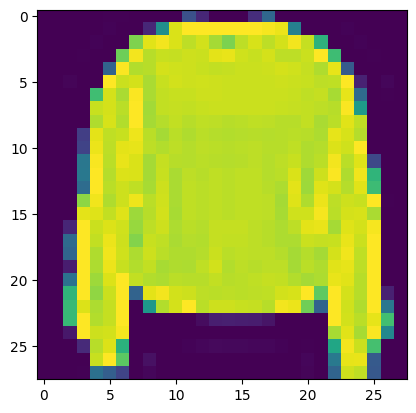

In [4]:
# Plot a sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [5]:
# Check samples label
train_labels[7]     # should return 2 = pullover

2

In [6]:
# Create a small list to index training labels so that they are words and not just numbers
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

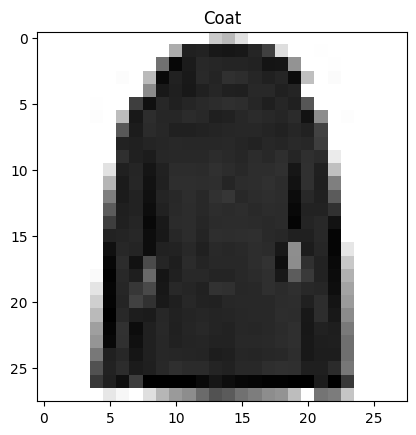

In [7]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

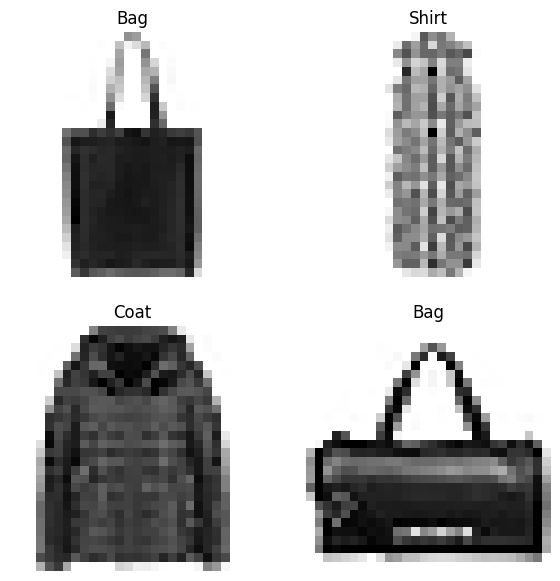

In [8]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Buidling a multi-class classification model

For multi-class classifictation model, can use similar architecture to binary classifiers, however there are a few differences:
  - input shape = 28 * 28 (shape of one image)
  - output shape = 10 (one per class of clothing)
  - loss function = tf.keras.losses.CategoricalCrossentropy
  - output layer activation = Softmax (not sigmoid)

In [9]:
# our data needs to be flattened (from (28, 28) to (None, 784))
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28))
])
flatten_model.output_shape # 28 * 28 = 784
# neural networks like data to be in one long vector

(None, 784)

In [10]:
train_labels[:10] # training labels are as integers not one hot encoded
# Therefore categorical_crossentropy needs to be changed to sparse

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [11]:
train_labels.shape

(60000,)

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 1 per each class (10)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training



Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.9988 - accuracy: 0.2367 - val_loss: 1.7184 - val_accuracy: 0.3032
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6380 - accuracy: 0.3159 - val_loss: 1.5801 - val_accuracy: 0.3372
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5426 - accuracy: 0.3528 - val_loss: 1.5109 - val_accuracy: 0.3522
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5105 - accuracy: 0.3667 - val_loss: 1.4823 - val_accuracy: 0.3937
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4959 - accuracy: 0.3760 - val_loss: 1.4889 - val_accuracy: 0.3857
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4639 - accuracy: 0.3853 - val_loss: 1.4790 - val_accuracy: 0.3832
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4626 - accuracy: 0.3883 - val_loss: 1.4534 - val_accuracy:

In [14]:
# Model summary
model_11.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Check min and max values of training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have numbers in tensors they try to find patterns in b/w 0 & 1.

In [16]:
# We can get our training and testing data b/w 0 & 1 by dividing by max
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check min and max values of scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [17]:
# Set rand seed
tf.random.set_seed(42)

# Create model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2204 - accuracy: 0.5347 - val_loss: 0.8302 - val_accuracy: 0.6955
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7294 - accuracy: 0.7323 - val_loss: 0.6927 - val_accuracy: 0.7350
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6328 - accuracy: 0.7642 - val_loss: 0.6376 - val_accuracy: 0.7680
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5806 - accuracy: 0.7971 - val_loss: 0.5878 - val_accuracy: 0.7943
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5451 - accuracy: 0.8153 - val_loss: 0.5930 - val_accuracy: 0.7995
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5244 - accuracy: 0.8222 - val_loss: 0.5561 - val_accuracy: 0.8088
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5133 - accuracy: 0.8263 - val_loss: 0.5594 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

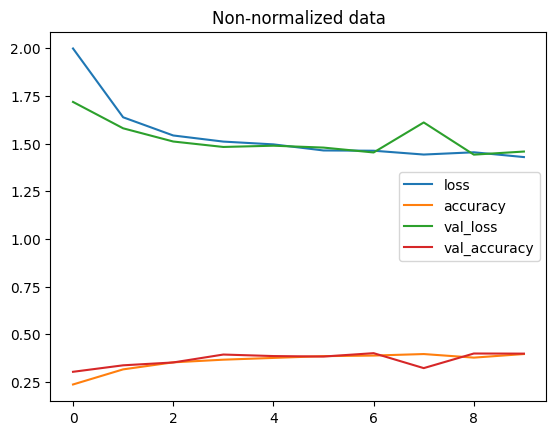

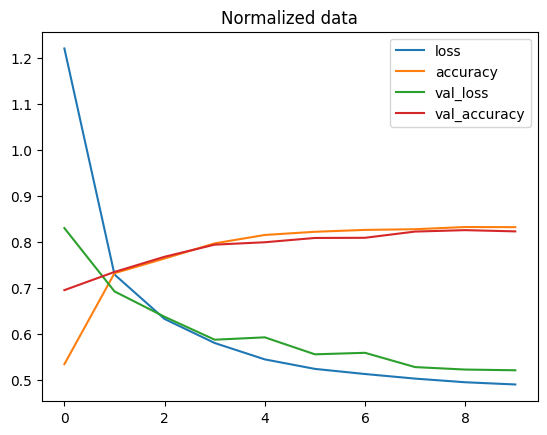

In [18]:
import pandas as pd
# plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

## Finding ideal learning rate

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4848 - accuracy: 0.4549 - val_loss: 1.1161 - val_accuracy: 0.5511 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9932 - accuracy: 0.6328 - val_loss: 0.9291 - val_accuracy: 0.6560 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8758 - accuracy: 0.6616 - val_loss: 0.8556 - val_accuracy: 0.6689 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8269 - accuracy: 0.6776 - val_loss: 0.8297 - val_accuracy: 0.6914 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7940 - accuracy: 0.7014 - val_loss: 0.8006 - val_accuracy: 0.7114 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7712 - accuracy: 0.7166 - val_loss: 0.8108 - val_accuracy: 0.7065 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

Text(0.5, 1.0, 'The Ideal Learning rate')

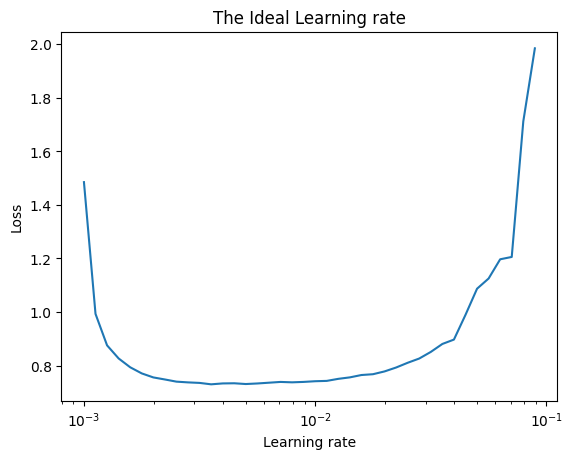

In [20]:
# Plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("The Ideal Learning rate")

In [21]:
10**-3

0.001

In [22]:
# Let's refit model w/ ideal learning rate

# Set rand seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile mode
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# Fit model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0707 - accuracy: 0.6183 - val_loss: 0.7729 - val_accuracy: 0.7267
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6990 - accuracy: 0.7474 - val_loss: 0.6891 - val_accuracy: 0.7491
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6406 - accuracy: 0.7617 - val_loss: 0.6604 - val_accuracy: 0.7533
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6156 - accuracy: 0.7673 - val_loss: 0.6436 - val_accuracy: 0.7588
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5990 - accuracy: 0.7721 - val_loss: 0.6439 - val_accuracy: 0.7593
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5887 - accuracy: 0.7760 - val_loss: 0.6263 - val_accuracy: 0.7598
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5800 - accuracy: 0.7787 - val_loss: 0.6207 - val_accuracy:

## Evaluating multi-class classification model

To evaluate multi-class classification model:
- Evaluate performance using other classification metrics (confusion matrix)
- Assess some of its predictions (through visualizations)
- Improve results by increasing training time or changing architecture
- save and export it for use in application



In [23]:
# Following code is similar to scikit-learn plot_confusion_matrix
# https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.plot_confusion_matrix.html

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize confusion matrix
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set threshold for diff colors
  threshold = (cm.max() + cm.min()) / 2

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Plot text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i , f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [24]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [28]:
# Make some predictions w/ model
y_probs = model_14.predict(test_data_norm) # probs is short for prediction probabilities

# make sure to predict on same data it was trained on

# View first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[8.1271137e-05, 3.9416438e-05, 2.5919740e-05, 7.0480285e-03,
        2.9798304e-08, 9.7427808e-02, 9.6863869e-06, 1.8018304e-01,
        4.1283321e-02, 6.7390156e-01],
       [1.3613350e-02, 1.2231292e-03, 4.9359992e-01, 1.0415496e-02,
        1.9563784e-01, 6.9708284e-04, 2.8293973e-01, 1.2516979e-03,
        6.0106604e-04, 2.0771216e-05],
       [5.7057070e-09, 9.9980855e-01, 9.1974732e-07, 4.4211870e-06,
        1.8612128e-04, 4.0114553e-33, 8.1694020e-09, 6.7271311e-10,
        1.8699644e-21, 3.4607121e-13],
       [3.4417820e-09, 9.9998432e-01, 1.4517340e-07, 9.0828744e-06,
        6.3572293e-06, 2.2905745e-32, 1.1884367e-09, 5.3685403e-09,
        1.1999026e-20, 1.2408838e-11],
       [1.6627395e-01, 1.5485993e-03, 1.2954774e-01, 3.6690775e-02,
        5.8070268e-02, 9.5371770e-06, 5.9329021e-01, 2.5529615e-04,
        1.4198873e-02, 1.1472605e-04]], dtype=float32)

In [32]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.1271137e-05, 3.9416438e-05, 2.5919740e-05, 7.0480285e-03,
        2.9798304e-08, 9.7427808e-02, 9.6863869e-06, 1.8018304e-01,
        4.1283321e-02, 6.7390156e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [33]:
# Convert all of prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 2, 5, 7])

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[735,   0,   8,  60,  11,   1, 173,   0,  12,   0],
       [  2, 934,   8,  29,  22,   0,   4,   0,   1,   0],
       [ 12,   0, 523,   8, 260,   0, 196,   0,   1,   0],
       [ 35,  10,  11, 821,  54,   0,  62,   1,   4,   2],
       [  0,   0, 229,  20, 695,   0,  55,   0,   1,   0],
       [  0,   0,   1,   2,   0, 888,   0,  68,  17,  24],
       [164,   0, 223,  34,  79,   0, 482,   0,  18,   0],
       [  0,   0,   0,   0,   0,  27,   0, 944,   2,  27],
       [  2,   0,   4,   7,   2,   9,  40,   2, 933,   1],
       [  0,   0,   0,   3,   0,  17,   0,  62,   7, 911]])

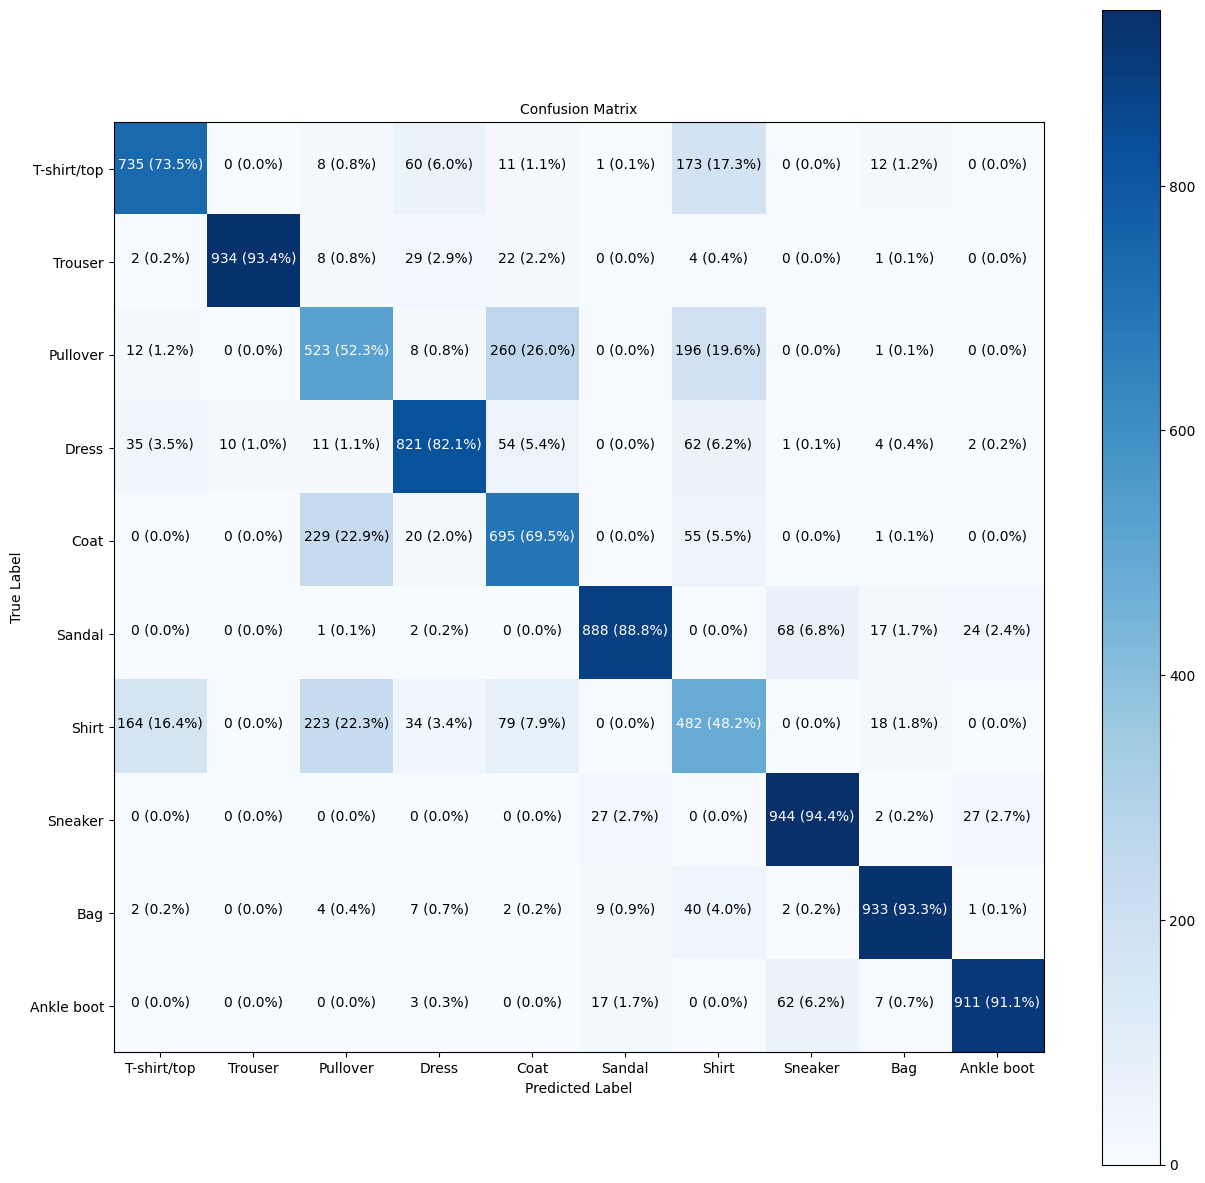

In [35]:
# Better version
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

 Creating a function for:
 - Plot a random image
 - Make a prediction on the random image
 - label plot w/ truth label and predicted label

In [36]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it w/ a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change color of titles depending on if predictions is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel info (prediction/true_label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set color to green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 16ms/step


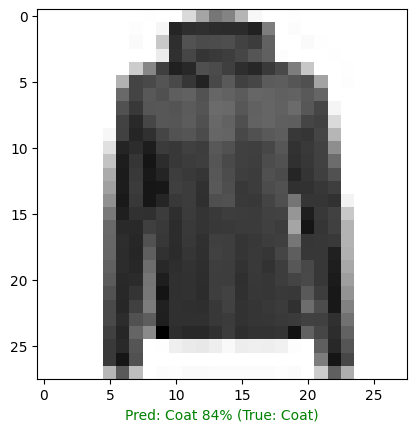

In [53]:
# Check out random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # always make predictions on same kind of data model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## Patterns

In [54]:
# Find layers of most recent model
model_14.layers

In [55]:
# Extract a particular layers
model_14.layers[1]

In [56]:
# Get patterns of a layer in the network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.0531274 , -0.5236143 , -0.26699865,  0.34464568],
        [-0.10815319, -0.17087942, -0.33235633,  0.77388203],
        [-0.6082939 , -0.87342864, -0.84085363, -0.09872515],
        ...,
        [-0.12244867, -0.1905909 ,  0.78496116,  0.03368506],
        [ 0.19443893, -0.18600848,  0.22448793, -0.00670078],
        [-0.42728156, -0.31576064, -0.47112703,  0.30545813]],
       dtype=float32),
 (784, 4))

Looking at the bias vector

In [57]:
# Bias and biases shapes
biases, biases.shape

(array([ 3.2238154 , -0.5087452 , -0.26587594,  0.785497  ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of which are paired w/ a weights matrix.

Bias vector also gets initialized as zeros (in the case of a Tensorflow dense layer)

Bias vector dictates how much patterns w/in corresponding weights matrix should influence the next layer

In [59]:
model_14.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


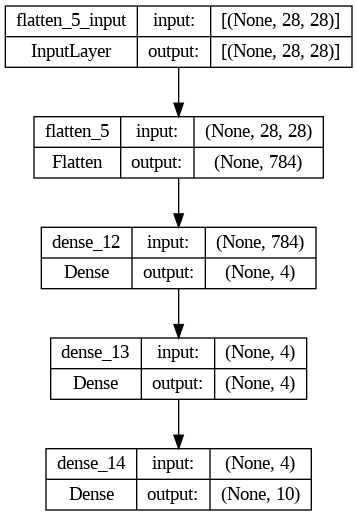

In [60]:
# Another way of visualizing the model
from tensorflow.keras.utils import plot_model
# See inputs and outputs of each layer
plot_model(model_14, show_shapes=True)